Weekly Games Data Cleaning

In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Provided dictionary
team_names = {
    'ARI': 'Arizona Cardinals',
    'ATL': 'Atlanta Falcons',
    'BAL': 'Baltimore Ravens',
    'BUF': 'Buffalo Bills',
    'CAR': 'Carolina Panthers',
    'CHI': 'Chicago Bears',
    'CIN': 'Cincinnati Bengals',
    'CLE': 'Cleveland Browns',
    'DAL': 'Dallas Cowboys',
    'DEN': 'Denver Broncos',
    'DET': 'Detroit Lions',
    'GB': 'Green Bay Packers',
    'HOU': 'Houston Texans',
    'IND': 'Indianapolis Colts',
    'JAX': 'Jacksonville Jaguars',
    'KC': 'Kansas City Chiefs',
    'LAC': 'Los Angeles Chargers',
    'LAR': 'Los Angeles Rams',
    'LV': 'Las Vegas Raiders',
    'MIA': 'Miami Dolphins',
    'MIN': 'Minnesota Vikings',
    'NE': 'New England Patriots',
    'NO': 'New Orleans Saints',
    'NYG': 'New York Giants',
    'NYJ': 'New York Jets',
    'PHI': 'Philadelphia Eagles',
    'PIT': 'Pittsburgh Steelers',
    'SEA': 'Seattle Seahawks',
    'SF': 'San Francisco 49ers',
    'TB': 'Tampa Bay Buccaneers',
    'TEN': 'Tennessee Titans',
    'WAS': 'Washington Commanders'
}

games = pd.read_csv('nfl_scores_and_lines.csv')
games = games[games['schedule_season'] > 2022]

#drop rows
games= games.drop('stadium', axis=1)
games= games.drop('stadium_neutral', axis=1)
games= games.drop('weather_temperature', axis=1)
games= games.drop('weather_wind_mph', axis=1)
games= games.drop('weather_humidity', axis=1)
games= games.drop('weather_detail', axis=1)

#change names
games['team_favorite_id'] = games['team_favorite_id'].map(team_names)


# encoder
label_encoder = LabelEncoder()

# Define a function to determine the winner
def get_winner(row):
    if row['score_home'] > row['score_away']:
        return 'home'
    elif row['score_home'] < row['score_away']:
        return 'away'
    else:
        return 'tie'  # In case of a tie
    
def get_winner2(row):
    if row['score_home_home'] > row['score_away_home']:
        return 'home'
    elif row['score_home_home'] < row['score_away_home']:
        return 'away'
    else:
        return 'tie'  # In case of a tie

# Apply the function to create a new column 'winner'
games['winner'] = games.apply(get_winner, axis=1)

# encoding
games['schedule_playoff'] = label_encoder.fit_transform(games['schedule_playoff'])
games['winner'] = label_encoder.fit_transform(games['winner'])


# Concatenate team_home, team_away, and team_favorite_id to capture all team names
all_teams = games['team_home'].append(games['team_away']).append(games['team_favorite_id'])
label_encoder.fit(all_teams)
games['team_home'] = label_encoder.transform(games['team_home'])
games['team_away'] = label_encoder.transform(games['team_away'])
games['team_favorite_id'] = label_encoder.transform(games['team_favorite_id'])

# convert to numeric
games['schedule_date'] = pd.to_datetime(games['schedule_date'])
games['schedule_date'] = games['schedule_date'].astype(int) / 10**9
games['schedule_week'] = pd.to_numeric(games['schedule_week'])



games

/var/folders/5v/dw8pg9hn4453bwh0qfjpty_h0000gn/T/ipykernel_54975/355850810.py:84: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_teams = games['team_home'].append(games['team_away']).append(games['team_favorite_id'])
/var/folders/5v/dw8pg9hn4453bwh0qfjpty_h0000gn/T/ipykernel_54975/355850810.py:84: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_teams = games['team_home'].append(games['team_away']).append(games['team_favorite_id'])


,Game ID,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,winner
13516,13516,1.694045e+09,2023,1,0,15,20,21,10,15,-4.5,53.0,0
13517,13517,1.694304e+09,2023,1,0,1,24,10,4,1,-3.5,39.5,1
13518,13518,1.694304e+09,2023,1,0,2,25,9,12,2,-9.5,43.5,1
13519,13519,1.694304e+09,2023,1,0,5,20,38,11,5,-1.0,41.5,0
13520,13520,1.694304e+09,2023,1,0,7,24,3,6,6,-2.0,47.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13783,13783,1.704586e+09,2023,18,0,22,48,17,1,22,-3.0,41.5,1
13784,13784,1.704586e+09,2023,18,0,23,27,10,25,25,-5.0,43.5,1
13785,13785,1.704586e+09,2023,18,0,27,20,21,18,27,-5.5,40.0,0
13786,13786,1.704586e+09,2023,18,0,30,28,20,14,32,-3.5,41.5,1


In [44]:
# Create decoding dictionaries for 'team_home', 'team_away', and 'team_favorite_id'
team_home_decoder = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
team_away_decoder = team_home_decoder  # Using the same decoder for 'team_away'
team_favorite_id_decoder = team_home_decoder  # Using the same decoder for 'team_favorite_id'

# Print the decoding dictionaries
print("Decoding Dictionary for 'team_home':")
print(team_home_decoder)
print("\nDecoding Dictionary for 'team_away':")
print(team_away_decoder)
print("\nDecoding Dictionary for 'team_favorite_id':")
print(team_favorite_id_decoder)

Decoding Dictionary for 'team_home':
{'Arizona Cardinals': 0, 'Atlanta Falcons': 1, 'Baltimore Ravens': 2, 'Buffalo Bills': 3, 'Carolina Panthers': 4, 'Chicago Bears': 5, 'Cincinnati Bengals': 6, 'Cleveland Browns': 7, 'Dallas Cowboys': 8, 'Denver Broncos': 9, 'Detroit Lions': 10, 'Green Bay Packers': 11, 'Houston Texans': 12, 'Indianapolis Colts': 13, 'Jacksonville Jaguars': 14, 'Kansas City Chiefs': 15, 'Las Vegas Raiders': 16, 'Los Angeles Chargers': 17, 'Los Angeles Rams': 18, 'Miami Dolphins': 19, 'Minnesota Vikings': 20, 'New England Patriots': 21, 'New Orleans Saints': 22, 'New York Giants': 23, 'New York Jets': 24, 'Philadelphia Eagles': 25, 'Pittsburgh Steelers': 26, 'San Francisco 49ers': 27, 'Seattle Seahawks': 28, 'Tampa Bay Buccaneers': 29, 'Tennessee Titans': 30, 'Washington Commanders': 31, nan: 32}

Decoding Dictionary for 'team_away':
{'Arizona Cardinals': 0, 'Atlanta Falcons': 1, 'Baltimore Ravens': 2, 'Buffalo Bills': 3, 'Carolina Panthers': 4, 'Chicago Bears': 5, 'C

Team Stats Data Cleaning

In [45]:
team_names_lower = {
    'crd': 'Arizona Cardinals',
    'atl': 'Atlanta Falcons',
    'rav': 'Baltimore Ravens',
    'buf': 'Buffalo Bills',
    'car': 'Carolina Panthers',
    'chi': 'Chicago Bears',
    'cin': 'Cincinnati Bengals',
    'cle': 'Cleveland Browns',
    'dal': 'Dallas Cowboys',
    'den': 'Denver Broncos',
    'det': 'Detroit Lions',
    'gnb': 'Green Bay Packers',
    'htx': 'Houston Texans',
    'clt': 'Indianapolis Colts',
    'jax': 'Jacksonville Jaguars',
    'kan': 'Kansas City Chiefs',
    'sdg': 'Los Angeles Chargers',
    'ram': 'Los Angeles Rams',
    'rai': 'Las Vegas Raiders',
    'mia': 'Miami Dolphins',
    'min': 'Minnesota Vikings',
    'nwe': 'New England Patriots',
    'nor': 'New Orleans Saints',
    'nyg': 'New York Giants',
    'nyj': 'New York Jets',
    'phi': 'Philadelphia Eagles',
    'pit': 'Pittsburgh Steelers',
    'sea': 'Seattle Seahawks',
    'sfo': 'San Francisco 49ers',
    'tam': 'Tampa Bay Buccaneers',
    'oti': 'Tennessee Titans',
    'was': 'Washington Commanders'
}

stats = pd.read_csv('stats_compiled.csv')


# only using 2023 data
stats = stats[stats['year'] == 2023]

# drop columns
stats= stats.drop('Unnamed: 0', axis=1)

#change names 
stats['team'] = stats['team'].map(team_names_lower)
# encode
stats['team'] = label_encoder.transform(stats['team'])

stats

,pt_total,yard,off_play,turnover_lost,fumble_lost,first_down,pass_complete,pass_attempt,pass_touchdown,interception_thrown,...,first_down_by_rush,penalty_yard,first_down_by_penalty,number_of_drive,avg_start_pos,time_per_drive,play_per_drive,net_yard_per_drive,team,year
13,321,5683,1092.0,28,11,326,327.0,530,17,17,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
27,451,6366,1115.0,28,10,381,385.0,579,29,18,...,158.0,883.0,24.0,181.0,29.0,181,6.32,35.1,3,2023
41,236,4510,1096.0,20,10,297,350.0,586,13,10,...,111.0,845.0,36.0,180.0,25.6,176,6.26,25.1,4,2023
55,360,5495,1097.0,25,10,322,321.0,513,19,15,...,137.0,853.0,16.0,184.0,29.8,177,6.15,29.8,5,2023
69,366,5422,1048.0,16,2,329,420.0,615,27,14,...,90.0,614.0,31.0,188.0,28.0,168,5.74,28.8,6,2023
83,396,5710,1187.0,37,14,325,355.0,624,24,23,...,121.0,897.0,31.0,222.0,29.7,148,5.50,25.6,7,2023
97,396,5725,1094.0,22,12,324,355.0,574,18,10,...,113.0,685.0,33.0,196.0,28.3,153,5.79,29.2,13,2023
111,330,5509,1068.0,18,6,330,355.0,555,18,12,...,127.0,859.0,30.0,180.0,26.2,166,6.12,30.4,0,2023
125,509,6317,1122.0,16,6,385,428.0,614,36,10,...,113.0,964.0,43.0,169.0,28.9,191,6.85,37.3,8,2023
139,357,5072,1016.0,22,13,301,337.0,513,28,9,...,116.0,749.0,31.0,189.0,30.8,159,5.56,26.8,9,2023


Merge Data + PCA Analysis

In [46]:
merged_home = pd.merge(games, stats, left_on='team_home', right_on='team', how='left')
merged_home

,Game ID,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,first_down_by_rush,penalty_yard,first_down_by_penalty,number_of_drive,avg_start_pos,time_per_drive,play_per_drive,net_yard_per_drive,team,year
0,13516,1.694045e+09,2023,1,0,15,20,21,10,15,...,107.0,845.0,27.0,178.0,28.6,173,6.22,33.3,15,2023
1,13517,1.694304e+09,2023,1,0,1,24,10,4,1,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
2,13518,1.694304e+09,2023,1,0,2,25,9,12,2,...,145.0,955.0,35.0,197.0,32.8,162,5.65,31.8,2,2023
3,13519,1.694304e+09,2023,1,0,5,20,38,11,5,...,137.0,853.0,16.0,184.0,29.8,177,6.15,29.8,5,2023
4,13520,1.694304e+09,2023,1,0,7,24,3,6,6,...,121.0,897.0,31.0,222.0,29.7,148,5.50,25.6,7,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,13783,1.704586e+09,2023,18,0,22,48,17,1,22,...,112.0,846.0,26.0,194.0,31.2,164,5.97,29.6,22,2023
268,13784,1.704586e+09,2023,18,0,23,27,10,25,25,...,97.0,711.0,29.0,199.0,28.8,151,5.47,23.8,23,2023
269,13785,1.704586e+09,2023,18,0,27,20,21,18,27,...,147.0,933.0,29.0,179.0,30.4,177,5.86,37.8,27,2023
270,13786,1.704586e+09,2023,18,0,30,28,20,14,32,...,103.0,882.0,37.0,181.0,27.3,168,5.70,26.9,30,2023


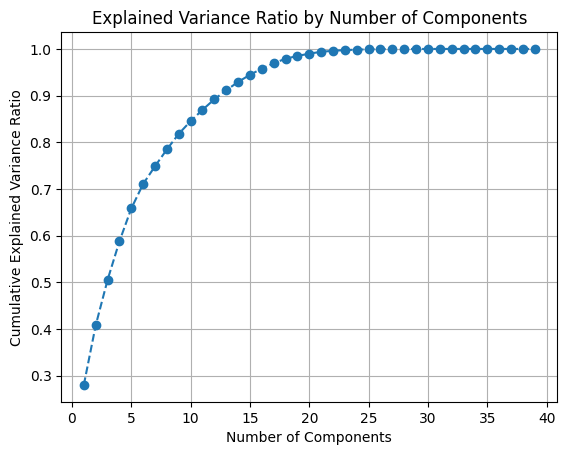

In [47]:
#pca analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop non-numeric columns (assuming all numeric columns are relevant for PCA)
merged_home = merged_home.select_dtypes(include='number')

# Handle missing values if any
merged_home.dropna(inplace=True)


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_home)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Visualize explained variance ratio
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

Loading Scores:
                                    PC1           PC2           PC3  \
Game ID                   -3.608081e-03 -7.371100e-03 -2.397478e-01   
schedule_date             -7.704407e-03 -5.841026e-05 -2.322076e-01   
schedule_season           -0.000000e+00  2.775558e-17  1.110223e-16   
schedule_week             -8.657168e-03  1.176530e-04 -2.325124e-01   
schedule_playoff           2.775558e-17  5.551115e-17 -5.551115e-17   
team_home                  1.101884e-01 -1.478778e-01 -2.136588e-01   
score_home                -1.617580e-01  3.365950e-02 -7.017458e-03   
score_away                 1.959355e-02 -4.542001e-02  1.643456e-02   
team_away                  4.404933e-03 -2.580015e-02 -3.683502e-02   
team_favorite_id           6.045578e-02 -1.330266e-01 -2.073574e-01   
spread_favorite            1.141002e-01  3.266674e-02 -6.435326e-03   
over_under_line           -1.380182e-01 -1.513632e-01  7.833917e-02   
winner                    -9.397928e-02  4.938241e-02 -1.9295

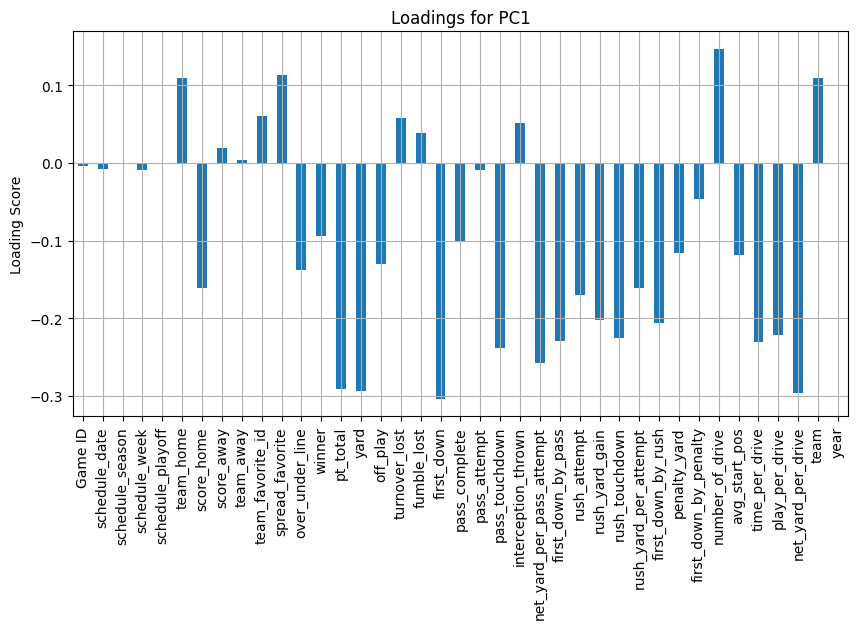

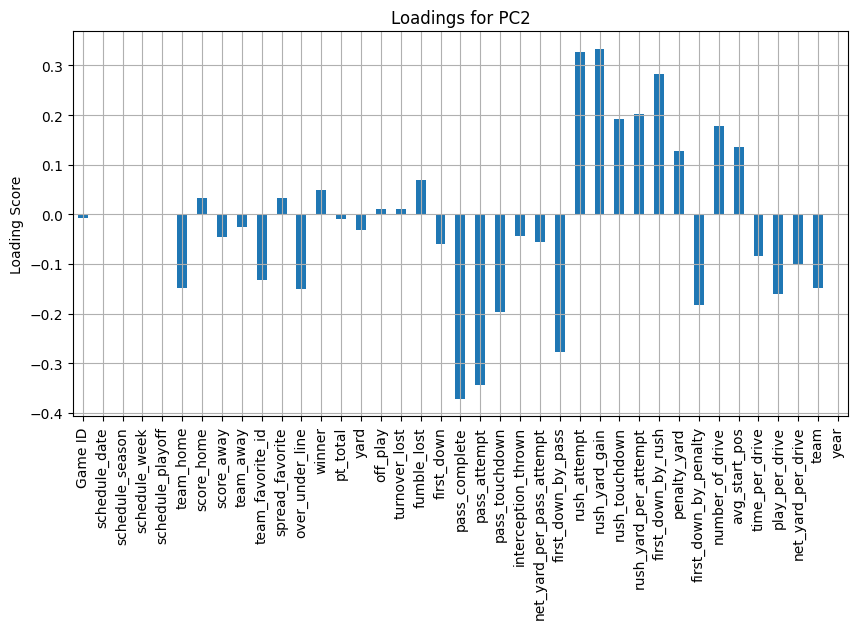

In [48]:
# Loadings are the coefficients of the original variables in the components
loadings = pca.components_
num_components = pca.n_components_

# Create a DataFrame of loadings with feature names as the index
features = merged_home.columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(num_components)], index=features)

# Display the loading scores for the first few components
print("Loading Scores:")
print(loadings_df)

# Plot the loadings for the first 2 principal components
for i in range(2):  # Adjust the range as needed for more components
    plt.figure(figsize=(10, 5))
    loadings_df.iloc[:, i].plot(kind='bar', title=f'Loadings for PC{i+1}')
    plt.ylabel('Loading Score')
    plt.grid(True)
    plt.show()

In [49]:
merged_away = pd.merge(games, stats, left_on='team_away', right_on='team', how='left')
merged_away

,Game ID,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,first_down_by_rush,penalty_yard,first_down_by_penalty,number_of_drive,avg_start_pos,time_per_drive,play_per_drive,net_yard_per_drive,team,year
0,13516,1.694045e+09,2023,1,0,15,20,21,10,15,...,124.0,843.0,23.0,187.0,30.4,171,6.19,35.8,10,2023
1,13517,1.694304e+09,2023,1,0,1,24,10,4,1,...,111.0,845.0,36.0,180.0,25.6,176,6.26,25.1,4,2023
2,13518,1.694304e+09,2023,1,0,2,25,9,12,2,...,84.0,937.0,30.0,191.0,27.1,159,5.87,30.4,12,2023
3,13519,1.694304e+09,2023,1,0,5,20,38,11,5,...,101.0,856.0,26.0,174.0,29.8,174,6.24,33.8,11,2023
4,13520,1.694304e+09,2023,1,0,7,24,3,6,6,...,90.0,614.0,31.0,188.0,28.0,168,5.74,28.8,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,13783,1.704586e+09,2023,18,0,22,48,17,1,22,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
268,13784,1.704586e+09,2023,18,0,23,27,10,25,25,...,149.0,785.0,31.0,177.0,28.9,179,6.46,34.0,25,2023
269,13785,1.704586e+09,2023,18,0,27,20,21,18,27,...,110.0,720.0,35.0,185.0,28.6,170,6.15,33.0,18,2023
270,13786,1.704586e+09,2023,18,0,30,28,20,14,32,...,98.0,644.0,39.0,195.0,31.2,162,5.90,29.5,14,2023


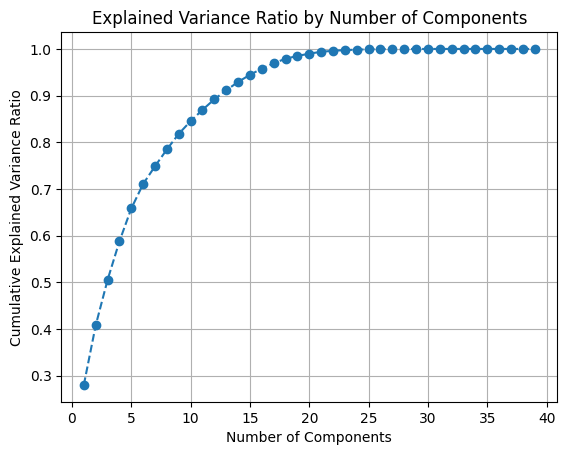

In [50]:
#pca analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop non-numeric columns (assuming all numeric columns are relevant for PCA)
merged_away = merged_away.select_dtypes(include='number')

# Handle missing values if any
merged_away.dropna(inplace=True)


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_home)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Visualize explained variance ratio
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

Loading Scores:
                                    PC1           PC2           PC3  \
Game ID                   -3.608081e-03 -7.371100e-03 -2.397478e-01   
schedule_date             -7.704407e-03 -5.841026e-05 -2.322076e-01   
schedule_season           -0.000000e+00  2.775558e-17  1.110223e-16   
schedule_week             -8.657168e-03  1.176530e-04 -2.325124e-01   
schedule_playoff           2.775558e-17  5.551115e-17 -5.551115e-17   
team_home                  1.101884e-01 -1.478778e-01 -2.136588e-01   
score_home                -1.617580e-01  3.365950e-02 -7.017458e-03   
score_away                 1.959355e-02 -4.542001e-02  1.643456e-02   
team_away                  4.404933e-03 -2.580015e-02 -3.683502e-02   
team_favorite_id           6.045578e-02 -1.330266e-01 -2.073574e-01   
spread_favorite            1.141002e-01  3.266674e-02 -6.435326e-03   
over_under_line           -1.380182e-01 -1.513632e-01  7.833917e-02   
winner                    -9.397928e-02  4.938241e-02 -1.9295

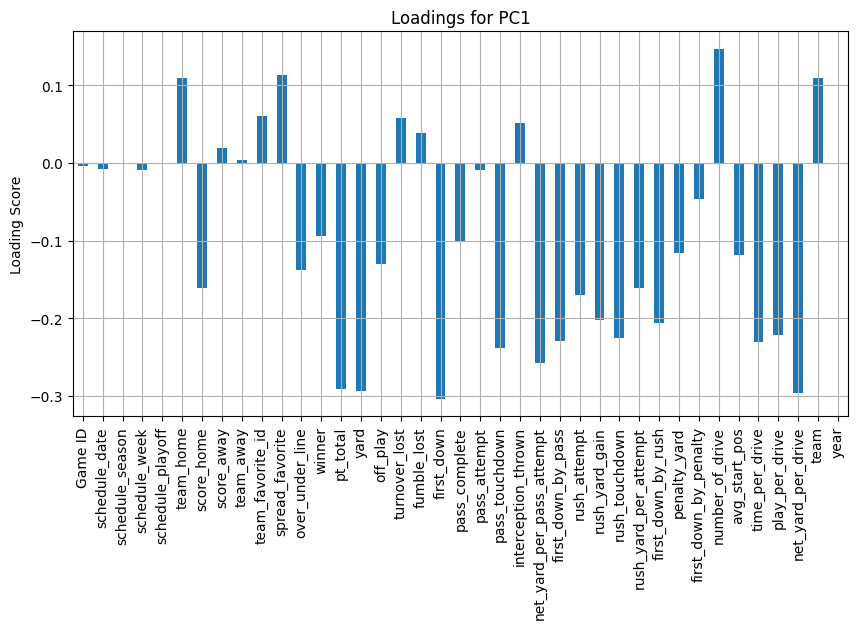

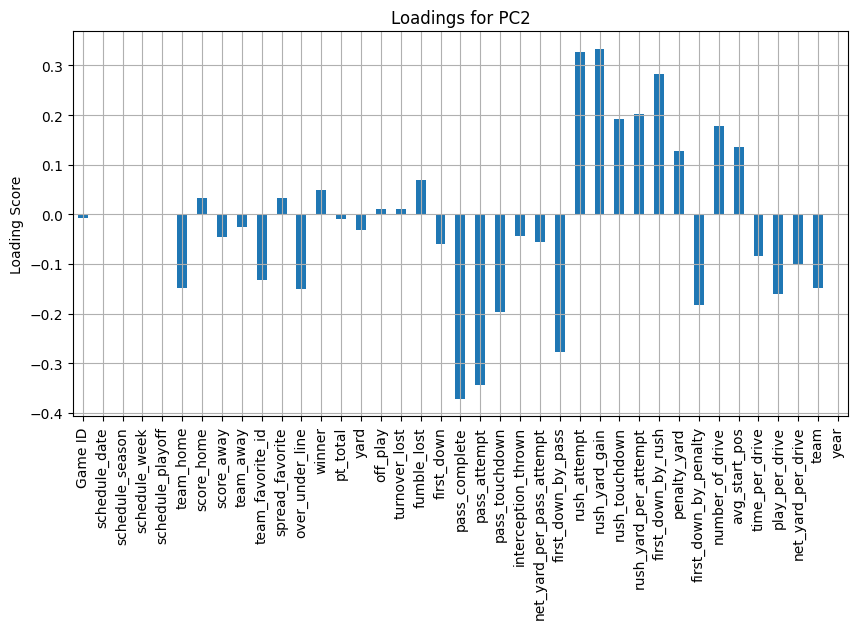

In [51]:
# Loadings are the coefficients of the original variables in the components
loadings = pca.components_
num_components = pca.n_components_

# Create a DataFrame of loadings with feature names as the index
features = merged_away.columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(num_components)], index=features)

# Display the loading scores for the first few components
print("Loading Scores:")
print(loadings_df)

# Plot the loadings for the first 2 principal components
for i in range(2):  # Adjust the range as needed for more components
    plt.figure(figsize=(10, 5))
    loadings_df.iloc[:, i].plot(kind='bar', title=f'Loadings for PC{i+1}')
    plt.ylabel('Loading Score')
    plt.grid(True)
    plt.show()

In [52]:
merged_home = merged_home.rename(columns=lambda x: x + '_home' if x != 'team' else x)
merged_away = merged_away.rename(columns=lambda x: x + '_away' if x != 'team' else x)

In [53]:
merged_home

,Game ID_home,schedule_date_home,schedule_season_home,schedule_week_home,schedule_playoff_home,team_home_home,score_home_home,score_away_home,team_away_home,team_favorite_id_home,...,first_down_by_rush_home,penalty_yard_home,first_down_by_penalty_home,number_of_drive_home,avg_start_pos_home,time_per_drive_home,play_per_drive_home,net_yard_per_drive_home,team,year_home
0,13516,1.694045e+09,2023,1,0,15,20,21,10,15,...,107.0,845.0,27.0,178.0,28.6,173,6.22,33.3,15,2023
1,13517,1.694304e+09,2023,1,0,1,24,10,4,1,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
2,13518,1.694304e+09,2023,1,0,2,25,9,12,2,...,145.0,955.0,35.0,197.0,32.8,162,5.65,31.8,2,2023
3,13519,1.694304e+09,2023,1,0,5,20,38,11,5,...,137.0,853.0,16.0,184.0,29.8,177,6.15,29.8,5,2023
4,13520,1.694304e+09,2023,1,0,7,24,3,6,6,...,121.0,897.0,31.0,222.0,29.7,148,5.50,25.6,7,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,13783,1.704586e+09,2023,18,0,22,48,17,1,22,...,112.0,846.0,26.0,194.0,31.2,164,5.97,29.6,22,2023
268,13784,1.704586e+09,2023,18,0,23,27,10,25,25,...,97.0,711.0,29.0,199.0,28.8,151,5.47,23.8,23,2023
269,13785,1.704586e+09,2023,18,0,27,20,21,18,27,...,147.0,933.0,29.0,179.0,30.4,177,5.86,37.8,27,2023
270,13786,1.704586e+09,2023,18,0,30,28,20,14,32,...,103.0,882.0,37.0,181.0,27.3,168,5.70,26.9,30,2023


In [54]:
# Check if any column has NaN values
if merged_home.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [55]:
merged_away

,Game ID_away,schedule_date_away,schedule_season_away,schedule_week_away,schedule_playoff_away,team_home_away,score_home_away,score_away_away,team_away_away,team_favorite_id_away,...,first_down_by_rush_away,penalty_yard_away,first_down_by_penalty_away,number_of_drive_away,avg_start_pos_away,time_per_drive_away,play_per_drive_away,net_yard_per_drive_away,team,year_away
0,13516,1.694045e+09,2023,1,0,15,20,21,10,15,...,124.0,843.0,23.0,187.0,30.4,171,6.19,35.8,10,2023
1,13517,1.694304e+09,2023,1,0,1,24,10,4,1,...,111.0,845.0,36.0,180.0,25.6,176,6.26,25.1,4,2023
2,13518,1.694304e+09,2023,1,0,2,25,9,12,2,...,84.0,937.0,30.0,191.0,27.1,159,5.87,30.4,12,2023
3,13519,1.694304e+09,2023,1,0,5,20,38,11,5,...,101.0,856.0,26.0,174.0,29.8,174,6.24,33.8,11,2023
4,13520,1.694304e+09,2023,1,0,7,24,3,6,6,...,90.0,614.0,31.0,188.0,28.0,168,5.74,28.8,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,13783,1.704586e+09,2023,18,0,22,48,17,1,22,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
268,13784,1.704586e+09,2023,18,0,23,27,10,25,25,...,149.0,785.0,31.0,177.0,28.9,179,6.46,34.0,25,2023
269,13785,1.704586e+09,2023,18,0,27,20,21,18,27,...,110.0,720.0,35.0,185.0,28.6,170,6.15,33.0,18,2023
270,13786,1.704586e+09,2023,18,0,30,28,20,14,32,...,98.0,644.0,39.0,195.0,31.2,162,5.90,29.5,14,2023


In [56]:
# Check if any column has NaN values
if merged_away.isna().any().any():
    print("There are NaN values in the DataFrame.")
else:
    print("There are no NaN values in the DataFrame.")

There are no NaN values in the DataFrame.


In [57]:
# Merge the datasets based on 'Game ID' and 'Game ID_away'
merged_data = pd.merge(merged_home, merged_away, left_on='Game ID_home', right_on='Game ID_away', how='left')

# Drop the duplicate 'Game ID_away' column
merged_data = merged_data.drop(columns='Game ID_away')

merged_data


,Game ID_home,schedule_date_home,schedule_season_home,schedule_week_home,schedule_playoff_home,team_home_home,score_home_home,score_away_home,team_away_home,team_favorite_id_home,...,first_down_by_rush_away,penalty_yard_away,first_down_by_penalty_away,number_of_drive_away,avg_start_pos_away,time_per_drive_away,play_per_drive_away,net_yard_per_drive_away,team_y,year_away
0,13516,1.694045e+09,2023,1,0,15,20,21,10,15,...,124.0,843.0,23.0,187.0,30.4,171,6.19,35.8,10,2023
1,13517,1.694304e+09,2023,1,0,1,24,10,4,1,...,111.0,845.0,36.0,180.0,25.6,176,6.26,25.1,4,2023
2,13518,1.694304e+09,2023,1,0,2,25,9,12,2,...,84.0,937.0,30.0,191.0,27.1,159,5.87,30.4,12,2023
3,13519,1.694304e+09,2023,1,0,5,20,38,11,5,...,101.0,856.0,26.0,174.0,29.8,174,6.24,33.8,11,2023
4,13520,1.694304e+09,2023,1,0,7,24,3,6,6,...,90.0,614.0,31.0,188.0,28.0,168,5.74,28.8,6,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,13783,1.704586e+09,2023,18,0,22,48,17,1,22,...,121.0,743.0,24.0,196.0,27.5,152,5.76,28.8,1,2023
267,13784,1.704586e+09,2023,18,0,23,27,10,25,25,...,149.0,785.0,31.0,177.0,28.9,179,6.46,34.0,25,2023
268,13785,1.704586e+09,2023,18,0,27,20,21,18,27,...,110.0,720.0,35.0,185.0,28.6,170,6.15,33.0,18,2023
269,13786,1.704586e+09,2023,18,0,30,28,20,14,32,...,98.0,644.0,39.0,195.0,31.2,162,5.90,29.5,14,2023


Random Forest on Home and Away

Mean Squared Error: 88.79340363636365


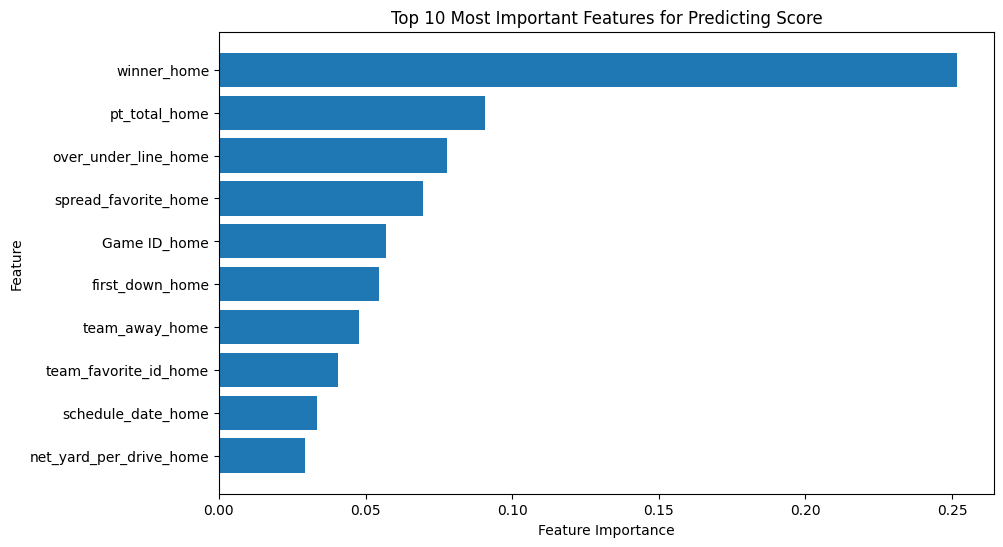

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = merged_home.drop(columns=['score_home_home', 'score_away_home'])  # Features
y = merged_home['score_home_home']  # Target variable for predicting home team's score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in both training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters here
rf_regressor.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot feature importances
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort indices of feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top 10 features
top_features_indices = sorted_indices[:10]
top_feature_names = feature_names[top_features_indices]
top_feature_importances = feature_importances[top_features_indices]

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Predicting Score')
plt.gca().invert_yaxis()  
plt.show()

Mean Squared Error: 91.52370363636366


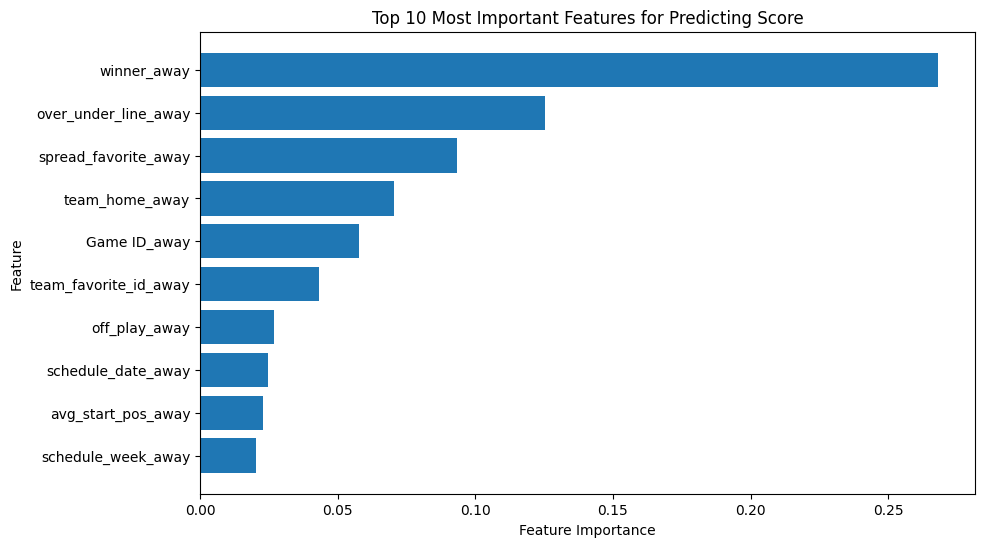

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = merged_away.drop(columns=['score_home_away', 'score_away_away'])  # Features
y = merged_away['score_home_away']  # Target variable for predicting home team's score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in both training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters here
rf_regressor.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot feature importances
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort indices of feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top 10 features
top_features_indices = sorted_indices[:10]
top_feature_names = feature_names[top_features_indices]
top_feature_importances = feature_importances[top_features_indices]

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Predicting Score')
plt.gca().invert_yaxis()  
plt.show()

Mean Squared Error: 91.52370363636366


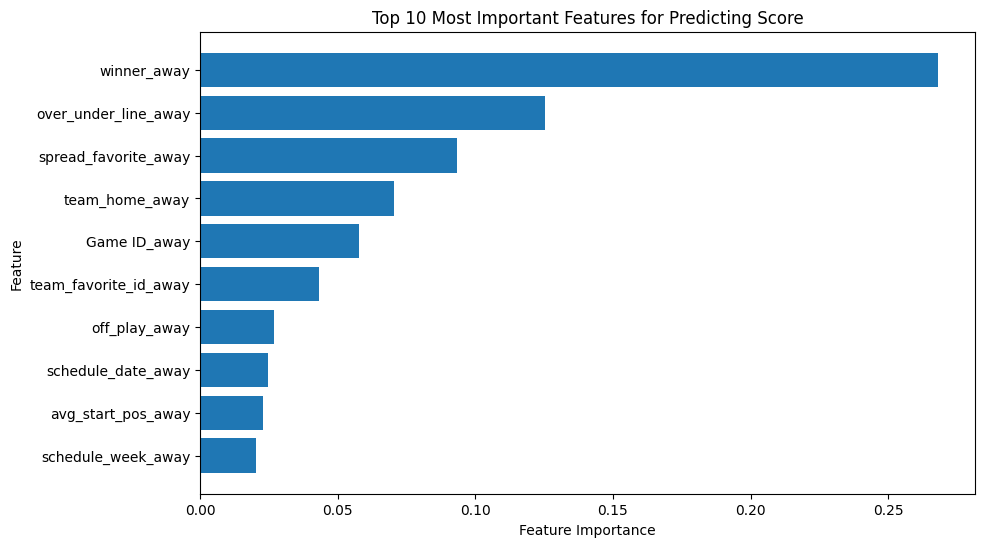

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


# Prepare the features and target variable
X = merged_away.drop(columns=['score_home_away', 'score_away_away'])  # Features
y = merged_away['score_home_away']  # Target variable for predicting home team's score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in both training and testing data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust parameters here
rf_regressor.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot feature importances
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort indices of feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top 10 features
top_features_indices = sorted_indices[:10]
top_feature_names = feature_names[top_features_indices]
top_feature_importances = feature_importances[top_features_indices]

# Plot bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_feature_names)), top_feature_importances, align='center')
plt.yticks(range(len(top_feature_names)), top_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features for Predicting Score')
plt.gca().invert_yaxis()  
plt.show()

Deep Learning Algo

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define X_home, y_home, X_away, y_away
X_home = merged_home.drop(columns=['spread_favorite_home', 'over_under_line_home', 'first_down_home', 'team_favorite_id_home', 'play_per_drive_home'])
y_home = merged_home['score_home_home']

X_away = merged_away.drop(columns=['spread_favorite_away', 'over_under_line_away', 'team_away_away', 'team_favorite_id_away', 'rush_yard_per_attempt_away'])
y_away = merged_away['score_away_away']

# Check for NaN values in the DataFrame
nan_values = X_away.isna()

# Count the number of NaN values in each column
nan_counts = nan_values.sum()

# Standardize the data for home team
scaler_home = StandardScaler()
X_home_scaled = scaler_home.fit_transform(X_home)

# Standardize the data for away team
scaler_away = StandardScaler()
X_away_scaled = scaler_away.fit_transform(X_away)

# Split the datasets into training and testing sets for home team
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home_scaled, y_home, test_size=0.2, random_state=42)

# Split the datasets into training and testing sets for away team
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away_scaled, y_away, test_size=0.2, random_state=42)

# Train the home team score prediction model with MLP Regressor
model_home = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42,
                           max_iter=1000, validation_fraction=0.1, n_iter_no_change=10)
model_home.fit(X_train_home, y_train_home)

# Train the away team score prediction model with MLP Regressor
model_away = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42,
                           max_iter=1000, validation_fraction=0.1, n_iter_no_change=10)
model_away.fit(X_train_away, y_train_away)

# Predict scores for the home and away teams for testing data
y_pred_home_test = model_home.predict(X_test_home)
y_pred_away_test = model_away.predict(X_test_away)

# Determine the winner of each game for testing data
test_winners = ['Home' if home_score > away_score else 'Away' if home_score < away_score else 'Tie'
                for home_score, away_score in zip(y_pred_home_test, y_pred_away_test)]

# Print the predicted scores and winners for testing data
print("\nPredicted Scores (Testing Data):")
for i, (home_score, away_score) in enumerate(zip(y_pred_home_test, y_pred_away_test)):
    print(f"Game {i+1}: Home Team Score - {home_score:.2f}, Away Team Score - {away_score:.2f}, Winner - {test_winners[i]}")

# Print the predicted winners for testing data
print("\nPredicted Winners (Testing Data):")
print(test_winners)

# Determine the accuracy score for testing data
accuracy_test = accuracy_score(y_test_home, y_pred_home_test > y_pred_away_test)
print("\nAccuracy Score (Testing Data):", accuracy_test)

# Predict scores for the home and away teams for training data
y_pred_home_train = model_home.predict(X_train_home)
y_pred_away_train = model_away.predict(X_train_away)

# Determine the winner of each game for training data
train_winners = ['Home' if home_score > away_score else 'Away' if home_score < away_score else 'Tie'
                for home_score, away_score in zip(y_pred_home_train, y_pred_away_train)]

# Print the predicted scores and winners for training data
print("\nPredicted Scores (Training Data):")
for i, (home_score, away_score) in enumerate(zip(y_pred_home_train, y_pred_away_train)):
    print(f"Game {i+1}: Home Team Score - {home_score:.2f}, Away Team Score - {away_score:.2f}, Winner - {train_winners[i]}")

# Print the predicted winners for training data
print("\nPredicted Winners (Training Data):")
print(train_winners)


Predicted Scores (Testing Data):
Game 1: Home Team Score - 16.90, Away Team Score - 19.40, Winner - Away
Game 2: Home Team Score - 8.98, Away Team Score - 20.05, Winner - Away
Game 3: Home Team Score - 17.54, Away Team Score - 22.42, Winner - Away
Game 4: Home Team Score - 26.12, Away Team Score - 1.14, Winner - Home
Game 5: Home Team Score - 27.23, Away Team Score - 12.89, Winner - Home
Game 6: Home Team Score - 24.37, Away Team Score - 20.76, Winner - Home
Game 7: Home Team Score - 30.28, Away Team Score - 45.13, Winner - Away
Game 8: Home Team Score - 4.89, Away Team Score - 37.24, Winner - Away
Game 9: Home Team Score - 31.85, Away Team Score - 12.93, Winner - Home
Game 10: Home Team Score - 22.42, Away Team Score - 20.25, Winner - Home
Game 11: Home Team Score - 34.08, Away Team Score - 18.65, Winner - Home
Game 12: Home Team Score - 28.45, Away Team Score - 20.00, Winner - Home
Game 13: Home Team Score - 29.33, Away Team Score - 10.95, Winner - Home
Game 14: Home Team Score - 17